# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
pip install datetime

   ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
   ---------------------------------------- 52.6/52.6 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define your API key
api_key = weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)
     
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | laredo
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | kingston
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | eirunepe
Processing Record 12 of Set 1 | novoderevyankovskaya
Processing Record 13 of Set 1 | palanga
Processing Record 14 of Set 1 | vanimo
Processing Record 15 of Set 1 | puerto colombia
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | necochea
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | maceio
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | haiku-pauwela
Processing Record

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [58]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,22.54,71,85,0.45,US,1722975772
1,talnakh,69.4865,88.3972,9.50,72,10,4.36,RU,1722976295
2,petropavlovsk-kamchatsky,53.0452,158.6483,11.33,100,75,2.00,RU,1722976295
3,laredo,27.5064,-99.5075,39.16,30,0,4.63,US,1722976153
4,bredasdorp,-34.5322,20.0403,9.69,90,0,0.96,ZA,1722976295


In [60]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [62]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,22.54,71,85,0.45,US,1722975772
1,talnakh,69.4865,88.3972,9.50,72,10,4.36,RU,1722976295
2,petropavlovsk-kamchatsky,53.0452,158.6483,11.33,100,75,2.00,RU,1722976295
3,laredo,27.5064,-99.5075,39.16,30,0,4.63,US,1722976153
4,bredasdorp,-34.5322,20.0403,9.69,90,0,0.96,ZA,1722976295


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

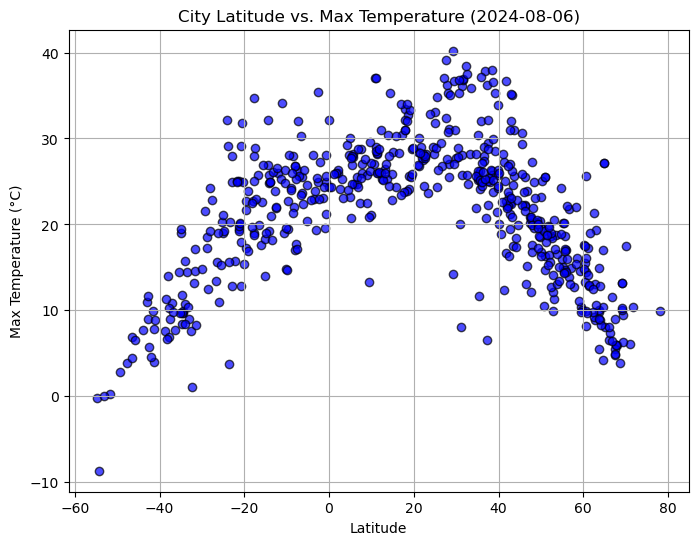

In [123]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c='blue', edgecolor='k', alpha=0.7, linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-08-06)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

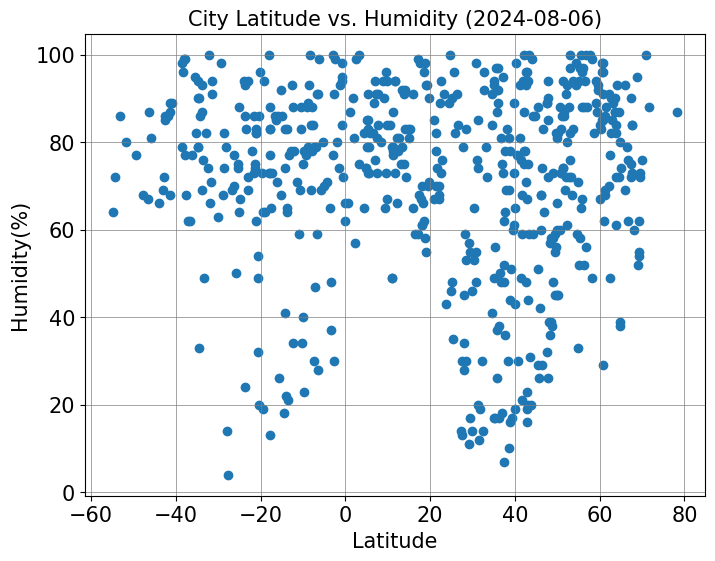

In [119]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df.Lat, city_data_df.Humidity, marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({datetime.now().date()})', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity(%)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

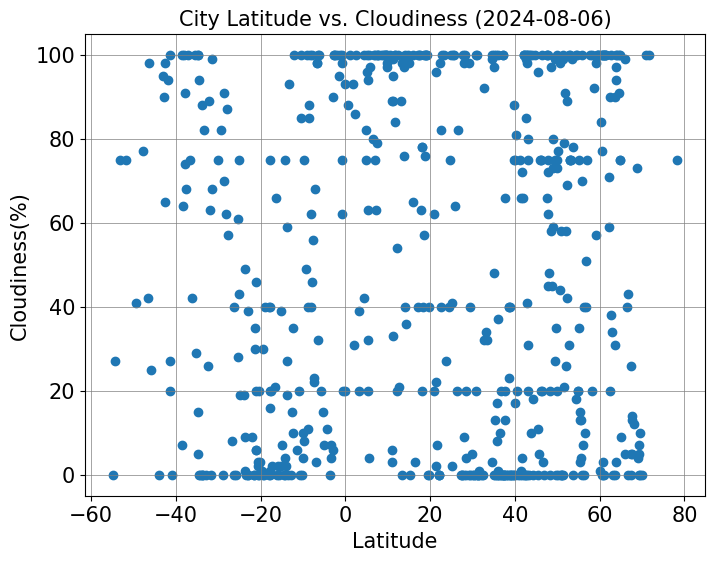

In [121]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df.Lat, city_data_df.Cloudiness, marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({datetime.now().date()})', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness(%)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

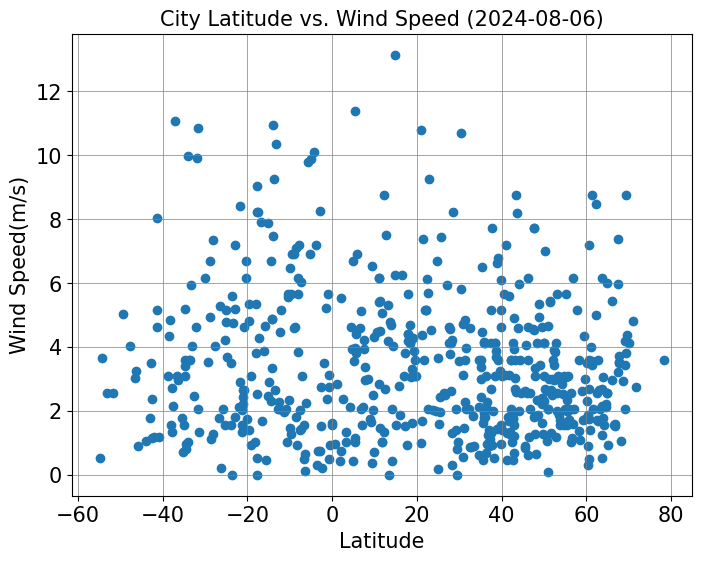

In [125]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df.Lat, city_data_df['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({datetime.now().date()})', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind Speed(m/s)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [202]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
def LR_plot(x, y, x_label, y_label, title):
    # Reshape the data for scikit-learn
    x_reshaped = np.array(x).reshape(-1, 1)
    y_reshaped = np.array(y)

    # Create a linear regression model
    model = LinearRegression()
    model.fit(x_reshaped, y_reshaped)

    # Make predictions using the model
    y_pred = model.predict(x_reshaped)

    # Calculate R-squared value
    r_squared = r2_score(y_reshaped, y_pred)
    print(f"The r^2-value is: {r_squared}")
    
    slp = model.coef_[0]
    inter = model.intercept_
    
#     print(f"y = {round(slp,2)}x + {round(inter,2)}")
    plt.figure(figsize=(8, 6))
    # Plot the data and the regression line
    plt.scatter(x, y, label='Data')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression')
    
    plt.text(0.05, 0.05, f"y = {round(slp,2)}x + {round(inter,2)}" , color='red', fontsize=20, ha='left', va='bottom', transform=plt.gca().transAxes)
    
    plt.title(f'{title}', fontsize=13)
    plt.xlabel(x_label, fontsize=13)
    plt.ylabel(y_label, fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [204]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,22.54,71,85,0.45,US,1722975772
1,talnakh,69.4865,88.3972,9.50,72,10,4.36,RU,1722976295
2,petropavlovsk-kamchatsky,53.0452,158.6483,11.33,100,75,2.00,RU,1722976295
3,laredo,27.5064,-99.5075,39.16,30,0,4.63,US,1722976153
5,iqaluit,63.7506,-68.5145,9.85,61,100,6.17,CA,1722976295


In [206]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,bredasdorp,-34.5322,20.0403,9.69,90,0,0.96,ZA,1722976295
6,edinburgh of the seven seas,-37.0676,-12.3116,10.89,62,100,11.08,SH,1722976295
9,margaret river,-33.9500,115.0667,15.77,69,88,9.96,AU,1722976296
10,eirunepe,-6.6603,-69.8736,30.27,59,98,0.49,BR,1722976296
13,vanimo,-2.6741,141.3028,24.92,91,100,2.73,PG,1722976296


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4551170623560058


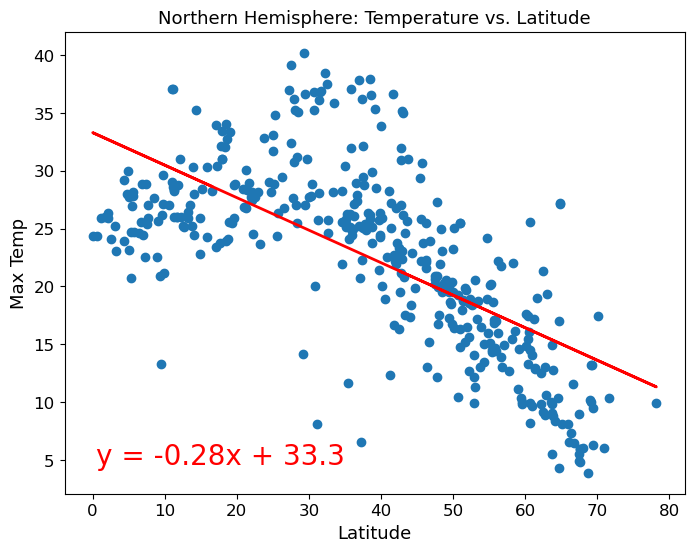

In [209]:
# Linear regression on Northern Hemisphere
LR_plot(northern_hemi_df.Lat, northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', "Northern Hemisphere: Temperature vs. Latitude")

The r^2-value is: 0.6387651704407367


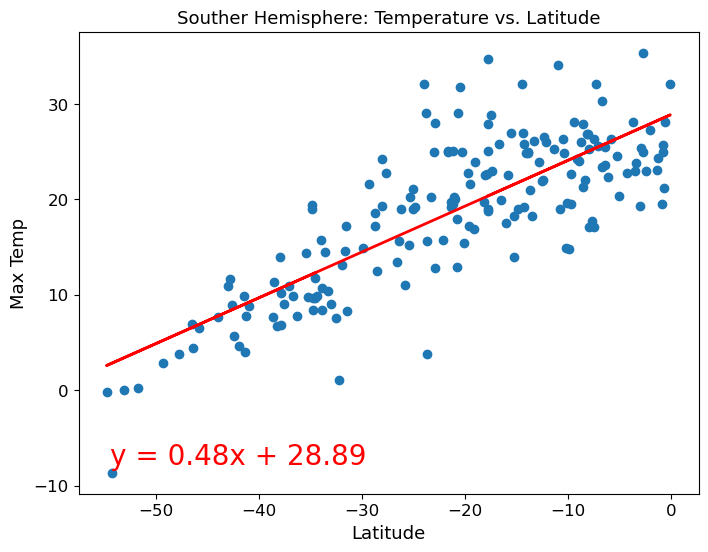

In [211]:
# Linear regression on Southern Hemisphere
LR_plot(southern_hemi_df.Lat, southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', "Souther Hemisphere: Temperature vs. Latitude")

**Discussion about the linear relationship:** According to the chart, the temperature has negative linear relationship in Northern Hemisphere with Latitude. On the other hand, the temperature has positive linear relationship in Northern Hemisphere with Latitude.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 1.5686159155814394e-05


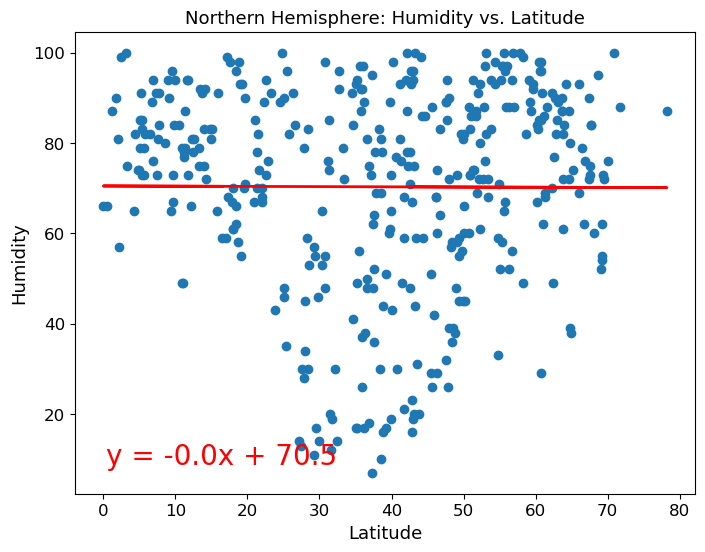

In [215]:
# Northern Hemisphere
LR_plot(northern_hemi_df.Lat, northern_hemi_df['Humidity'], 'Latitude', 'Humidity', "Northern Hemisphere: Humidity vs. Latitude")

The r^2-value is: 0.010161891125067823


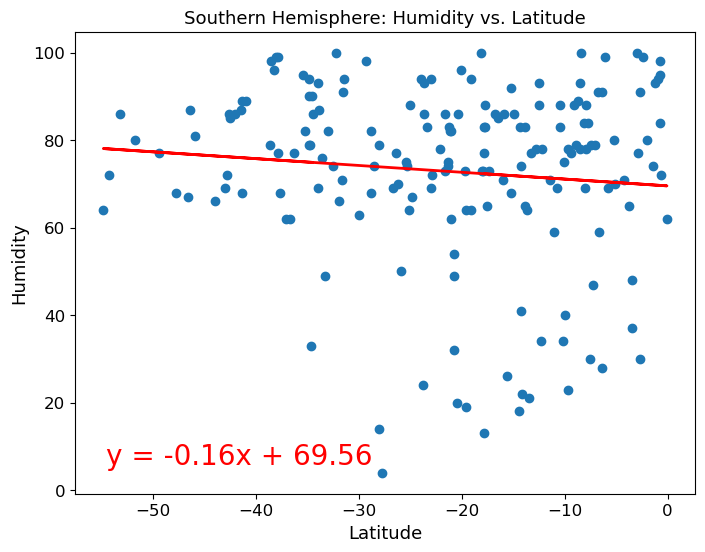

In [217]:
# Southern Hemisphere
LR_plot(southern_hemi_df.Lat, southern_hemi_df['Humidity'], 'Latitude', 'Humidity', "Southern Hemisphere: Humidity vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.02190467260809892


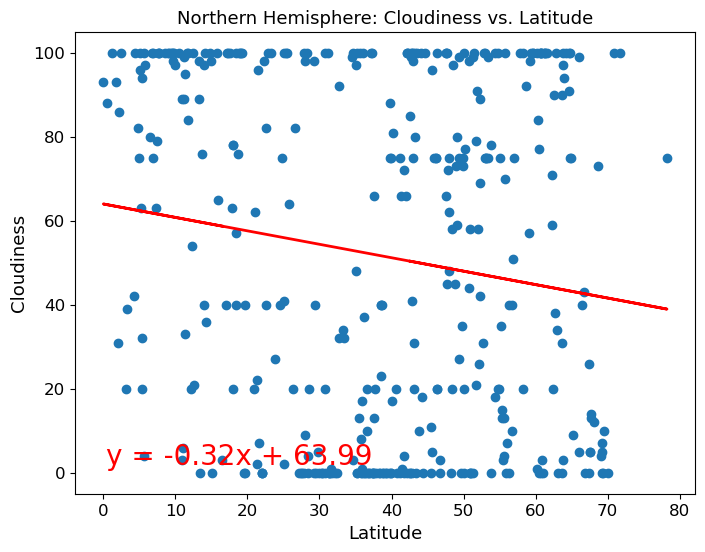

In [221]:
# Northern Hemisphere
LR_plot(northern_hemi_df.Lat, northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', "Northern Hemisphere: Cloudiness vs. Latitude")

The r^2-value is: 0.003403186674097558


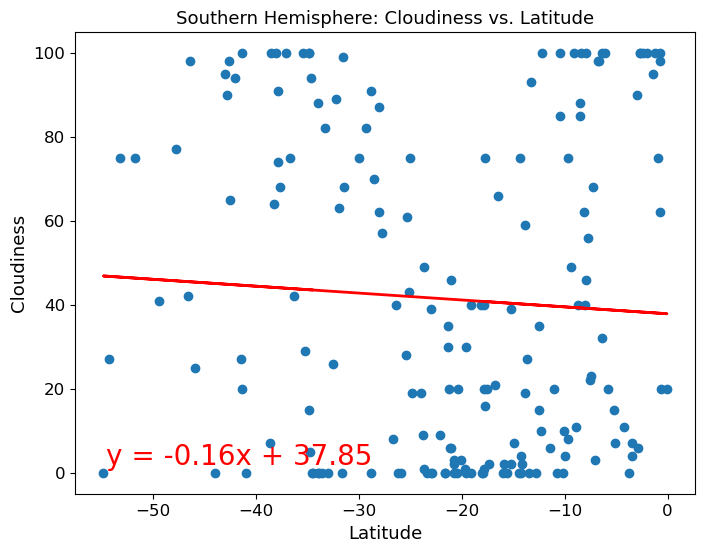

In [223]:
# Southern Hemisphere
LR_plot(southern_hemi_df.Lat, southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', "Southern Hemisphere: Cloudiness vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.008506167766675898


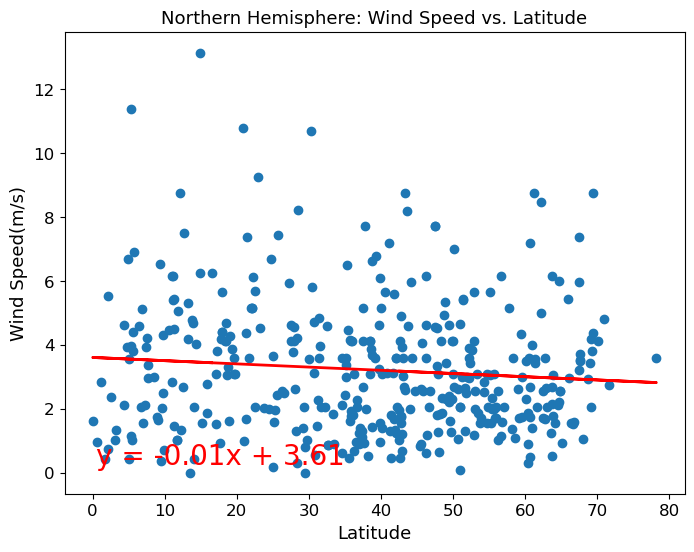

In [227]:
# Northern Hemisphere
LR_plot(northern_hemi_df.Lat, northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed(m/s)', "Northern Hemisphere: Wind Speed vs. Latitude")

The r^2-value is: 0.006318095237046406


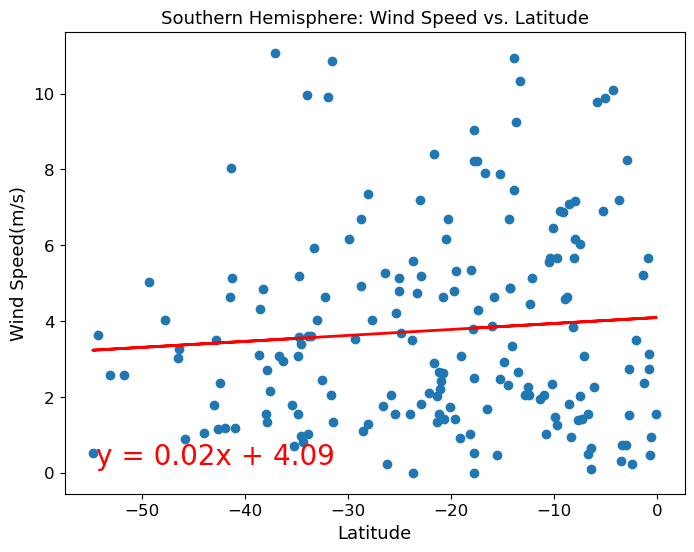

In [229]:
# Southern Hemisphere
LR_plot(southern_hemi_df.Lat, southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed(m/s)', "Southern Hemisphere: Wind Speed vs. Latitude")

**Discussion about the linear relationship:**  We can't establish any linear relationship among Wind Speed and Latitude in both Northern and Southern Hemisphere as the Wind Speed data is very scattered in all the Latitudes.